In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [10]:
data = pd.read_csv('./data/clean_data.csv', index_col=0).drop('mixins', axis=1)

In [11]:
data.head()

,sugar_flour_ratio,sugar_index,bake_temp,chill_time,calories,density,pH,gr_baking_soda,bake_time,quality,weight,crunch_factor,butter_type_melted,chocolate,raisins,oats,nuts,peanut butter
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,15.2,1.30,1,0,1,0,0,0
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,12.4,1.71,1,0,1,0,0,0
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,9.4,1.78,1,1,0,0,1,0
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,12.2,1.59,1,1,0,0,0,0
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,19.8,1.30,0,1,0,1,1,0


In [190]:
data.quality.unique()

array([ 8,  7,  9,  5,  3, 10,  6,  4, 11])

## Checking for correlations among the variables

In [ ]:
data_numeric = data[['']]

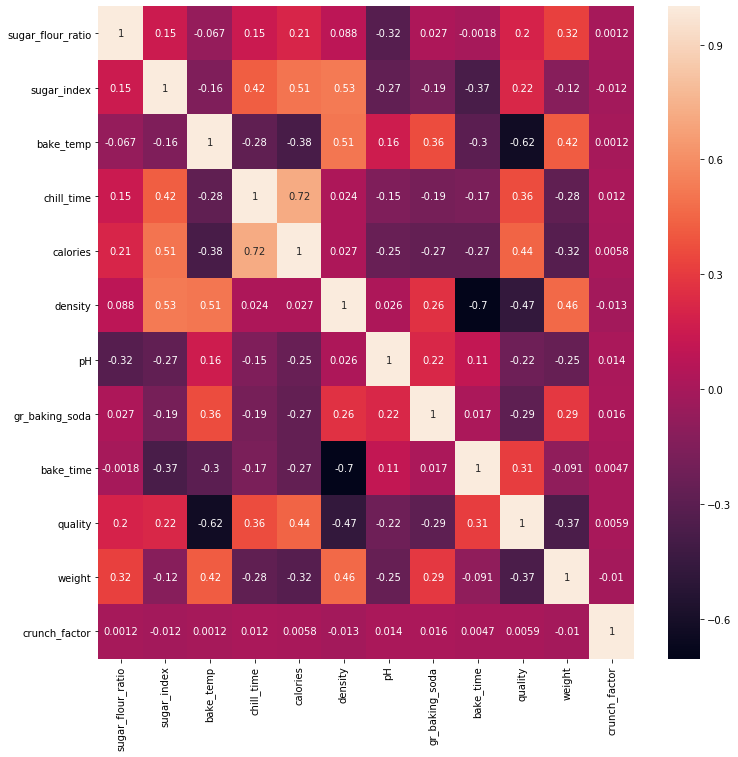

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(data.iloc[:,:-6].corr(), annot=True)

#### Checking Multicolinearity with a Variance inflation factor test

In [17]:
from statsmodels.stats import outliers_influence
from statsmodels.tools.tools import add_constant

X = add_constant(data.iloc[:,:-6])
X.drop('quality', axis=1, inplace=True)

mc_check = pd.Series([outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
             index=X.columns)
print(mc_check)

const                1.935349e+06
sugar_flour_ratio    1.374728e+00
sugar_index          7.505539e+00
bake_temp            2.317743e+00
chill_time           2.113326e+00
calories             2.953830e+00
density              1.791960e+01
pH                   2.673442e+00
gr_baking_soda       1.501603e+00
bake_time            5.091331e+00
weight               5.353303e+00
crunch_factor        1.001258e+00
dtype: float64


#### We decided to remove sugar index as it was the random variable causing multicolinearity in our dataset

In [18]:

X.drop('sugar_index', axis=1, inplace=True)

mc_check = pd.Series([outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
             index=X.columns)
print(mc_check)

const                416731.049588
sugar_flour_ratio         1.352234
bake_temp                 1.840660
chill_time                2.098970
calories                  2.811535
density                   3.689207
pH                        1.515187
gr_baking_soda            1.311735
bake_time                 2.778669
weight                    2.472689
crunch_factor             1.001175
dtype: float64


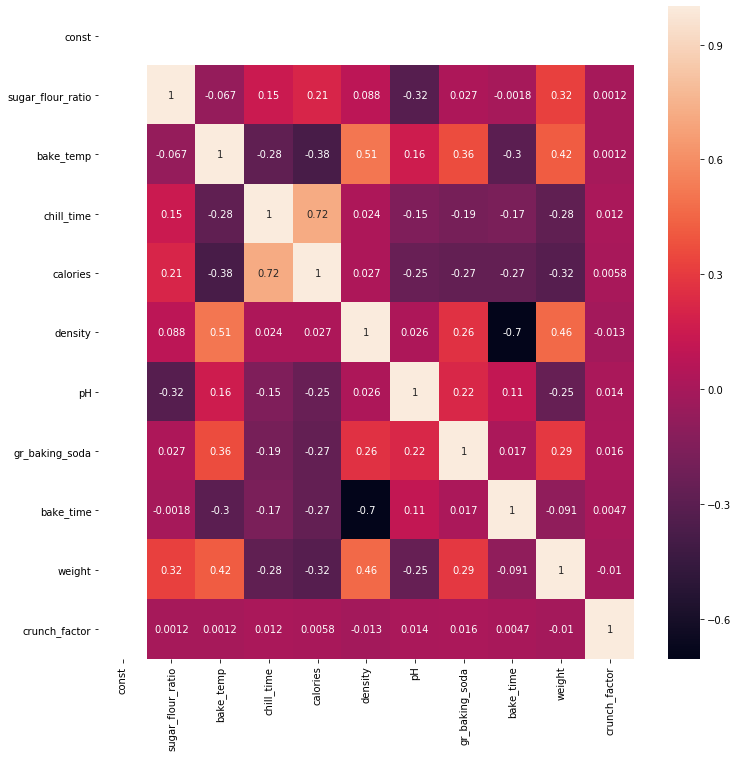

In [20]:
plt.figure(figsize=(12,12))
sns.heatmap(X.corr(), annot=True)

## Model selection and Metrics

Supervised Machine Learning models to use:

1- Linear Regression model (R-squared)


2- Classification model (Accuracy, Recall, F1-score, Precision)


#### Spliting the dataset into target and data

In [220]:
y = data[['quality']]

In [221]:
X = data.drop(['quality', 'sugar_index'], axis=1)

In [222]:
X.head()

,sugar_flour_ratio,bake_temp,chill_time,calories,density,pH,gr_baking_soda,bake_time,weight,crunch_factor,butter_type_melted,chocolate,raisins,oats,nuts,peanut butter
0,0.25,300,15.0,136.0,0.99367,8.10,0.44,12.1,15.2,1.30,1,0,1,0,0,0
1,0.23,520,34.0,113.0,0.99429,8.16,0.48,8.4,12.4,1.71,1,0,1,0,0,0
2,0.18,360,33.0,106.0,0.98746,8.21,0.83,14.0,9.4,1.78,1,1,0,0,1,0
3,0.18,490,41.0,124.0,0.99630,8.14,0.35,10.5,12.2,1.59,1,1,0,0,0,0
4,0.24,770,6.0,33.0,0.99740,8.09,0.57,9.4,19.8,1.30,0,1,0,1,1,0


### Linear regression

In [223]:
model_linear_reg = LinearRegression()

### Feature selection

In [224]:
X.head()

,sugar_flour_ratio,bake_temp,chill_time,calories,density,pH,gr_baking_soda,bake_time,weight,crunch_factor,butter_type_melted,chocolate,raisins,oats,nuts,peanut butter
0,0.25,300,15.0,136.0,0.99367,8.10,0.44,12.1,15.2,1.30,1,0,1,0,0,0
1,0.23,520,34.0,113.0,0.99429,8.16,0.48,8.4,12.4,1.71,1,0,1,0,0,0
2,0.18,360,33.0,106.0,0.98746,8.21,0.83,14.0,9.4,1.78,1,1,0,0,1,0
3,0.18,490,41.0,124.0,0.99630,8.14,0.35,10.5,12.2,1.59,1,1,0,0,0,0
4,0.24,770,6.0,33.0,0.99740,8.09,0.57,9.4,19.8,1.30,0,1,0,1,1,0


##### Backwards elimination

In [225]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE

In [226]:
rfe = RFE(model_linear_reg, 3)

In [227]:
rfe = rfe.fit(X.iloc[:,:-6], y)
for x in zip(rfe.ranking_, X.columns):
    print(x)

(1, 'sugar_flour_ratio')
(8, 'bake_temp')
(6, 'chill_time')
(5, 'calories')
(1, 'density')
(2, 'pH')
(1, 'gr_baking_soda')
(3, 'bake_time')
(4, 'weight')
(7, 'crunch_factor')


/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [228]:
rfe = RFE(model_linear_reg, 5)

In [229]:
rfe = rfe.fit(X, y)
for x in zip(rfe.ranking_, X.columns):
    print(x)

(7, 'sugar_flour_ratio')
(12, 'bake_temp')
(10, 'chill_time')
(11, 'calories')
(1, 'density')
(6, 'pH')
(1, 'gr_baking_soda')
(1, 'bake_time')
(8, 'weight')
(9, 'crunch_factor')
(1, 'butter_type_melted')
(3, 'chocolate')
(4, 'raisins')
(5, 'oats')
(2, 'nuts')
(1, 'peanut butter')


/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Selecting only the attributes that were ranked best in our backwards elimination process

In [230]:
X_feature_selct = X.iloc[:,[4,6,7,10,11,12,14,15]]

In [231]:
X_feature_selct.head()

,density,gr_baking_soda,bake_time,butter_type_melted,chocolate,raisins,nuts,peanut butter
0,0.99367,0.44,12.1,1,0,1,0,0
1,0.99429,0.48,8.4,1,0,1,0,0
2,0.98746,0.83,14.0,1,1,0,1,0
3,0.99630,0.35,10.5,1,1,0,0,0
4,0.99740,0.57,9.4,0,1,0,1,0


### Splitting our data into train and test with the columns selected based on backwards elimination

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X_feature_selct, y, test_size=0.30, random_state=12)

In [233]:
model_linear_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [234]:
model_linear_reg.score(X_train,y_train)

0.6479047373663722

In [235]:
import statsmodels.api as sm

In [236]:
X_train = sm.add_constant(X_train, prepend=False)
mod = sm.OLS(y_train, X_train)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     814.0
Date:                Fri, 16 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:07:25   Log-Likelihood:                -4093.4
No. Observations:                3548   AIC:                             8205.
Df Residuals:                    3539   BIC:                             8260.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
density               32.2199      7

/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### Making the predicitons

In [237]:
y_pred = model_linear_reg.predict(X_test)

In [238]:
r2_score(y_test, y_pred)

0.6873089071424154

#### Linear regression model without "raisins" as p-value > 0.05

In [239]:
X_feature_selct_no_raisins = X_feature_selct.drop('raisins', axis=1)

In [240]:
X_train_wo_raisins, X_test_wo_raisins, y_train_wo_raisins, y_test_wo_raisins = train_test_split(X_feature_selct_no_raisins, y, test_size=0.30, random_state=12)



In [241]:
model_linear_reg_wo_rai = LinearRegression()

In [242]:
model_linear_reg_wo_rai.fit(X_train_wo_raisins,y_train_wo_raisins)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [243]:
model_linear_reg_wo_rai.score(X_train_wo_raisins,y_train_wo_raisins)

0.6478152197264655

In [244]:
X_train_wo_raisins = sm.add_constant(X_train_wo_raisins, prepend=False)
mod = sm.OLS(y_train_wo_raisins, X_train_wo_raisins)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     930.2
Date:                Fri, 16 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:07:39   Log-Likelihood:                -4093.9
No. Observations:                3548   AIC:                             8204.
Df Residuals:                    3540   BIC:                             8253.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
density               32.4642      7

/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [245]:
y_pred = model_linear_reg_wo_rai.predict(X_test_wo_raisins)

In [246]:
r2_score(y_test_wo_raisins, y_pred)

0.6873028683575747

In [247]:
y_pred.shape

(1521, 1)

## Predicting quality with the independent test

In [248]:
X_feature_selct_no_raisins.head()

,density,gr_baking_soda,bake_time,butter_type_melted,chocolate,nuts,peanut butter
0,0.99367,0.44,12.1,1,0,0,0
1,0.99429,0.48,8.4,1,0,0,0
2,0.98746,0.83,14.0,1,1,1,0
3,0.99630,0.35,10.5,1,1,0,0
4,0.99740,0.57,9.4,0,1,1,0


In [200]:
X_feature_selct_no_raisins.columns

Index(['density', 'gr_baking_soda', 'bake_time', 'butter_type_melted',
       'chocolate', 'nuts', 'peanut butter'],
      dtype='object')

In [201]:
lst_columns_for_modeling = ['density', 'gr_baking_soda', 'bake_time', 'butter_type_melted',
       'chocolate', 'nuts', 'peanut butter']

In [204]:
data_ind_test = pd.read_csv('./data/clean_evaluate.csv')

In [205]:
data_ind_test.head()

,Unnamed: 0,index,Unnamed: 0.1,sugar_flour_ratio,sugar_index,bake_temp,chill_time,calories,density,pH,...,diameter,mixins,crunch_factor,aesthetic_appeal,butter_type_melted,chocolate,raisins,oats,nuts,peanut butter
0,0,0,14,0.62,19.25,400.0,41.0,172.0,1.0002,7.98,...,7,"nuts, chocolate",1.85,3,1,1,0,0,1,0
1,1,1,26,0.35,1.00,520.0,35.0,146.0,0.9930,8.45,...,7,chocolate,1.43,3,1,1,0,0,0,0
2,2,2,30,0.39,10.40,440.0,20.0,142.0,0.9974,8.20,...,7,chocolate,1.57,3,1,1,0,0,0,0
3,3,3,52,0.33,1.10,570.0,21.0,82.0,0.9910,8.32,...,7,"chocolate, oats",1.44,3,1,1,0,1,0,0
4,4,4,100,0.37,13.50,600.0,52.0,192.0,0.9975,8.00,...,7,chocolate,1.51,3,1,1,0,0,0,0


In [250]:
X = data_ind_test[lst_columns_for_modeling]

In [251]:
X.shape

(779, 7)

In [253]:
y = data_ind_test[['quality']]

In [254]:
y.shape

(779, 1)

In [256]:
y_pred = model_linear_reg_wo_rai.predict(X)

In [257]:
data_ind_test['predictions_quality'] = y_pred

In [259]:
data_ind_test.drop(['Unnamed: 0', 'index', 'Unnamed: 0.1'], axis=1, inplace=True)

In [260]:
data_ind_test.to_csv('./data_predictions.csv')